In [3]:
import EOSgenerators.crust_EOS as crust
import EOSgenerators.fastRMF_EoS as fast
import EOSgenerators.RMF_EOS as RMF
import TOVsolver.main as main
import TOVsolver.EoS_import as EoS_import
from matplotlib import pyplot
import matplotlib.pyplot as plt
import TOVsolver.constant as constant
from itertools import repeat
import numpy as np
import math

In [4]:
c = constant.c
G = constant.G
oneoverfm_MeV = constant.oneoverfm_MeV
Tolos_crust_out = np.loadtxt('Tolos_crust_out.txt', delimiter='  ')
eps_crust_T_out = Tolos_crust_out[:,3] * G / c**2
pres_crust_T_out = Tolos_crust_out[:,4] * G / c**4

eps_com, pres_com = crust.PolyInterpolate(eps_crust_T_out, pres_crust_T_out)


In [6]:
m_sig = (495.0)/oneoverfm_MeV
m_w = 3.96544
m_rho = 3.86662

g_sigma = math.sqrt(107.5751)
g_omega = math.sqrt(182.3949)
g_rho = math.sqrt(206.4260)

kappa = 3.09114168/197.33
lambda_0 = -0.00168015405
zeta = 0.024
Lambda_w = 0.045
theta = np.array([m_sig, m_w, m_rho, g_sigma, g_omega, g_rho, kappa, lambda_0, zeta, Lambda_w])
eps, pres = RMF.compute_EOS(eps_com, pres_com, theta)

In [9]:
eps_total = np.array([*eps_com, *eps])
pres_total = np.array([*pres_com, *pres])

In [11]:
MR = main.OutputMR('',eps_total,pres_total).T

Mass Radius file will be generated and stored as  2-d array. The first column is Radius, second one is mass


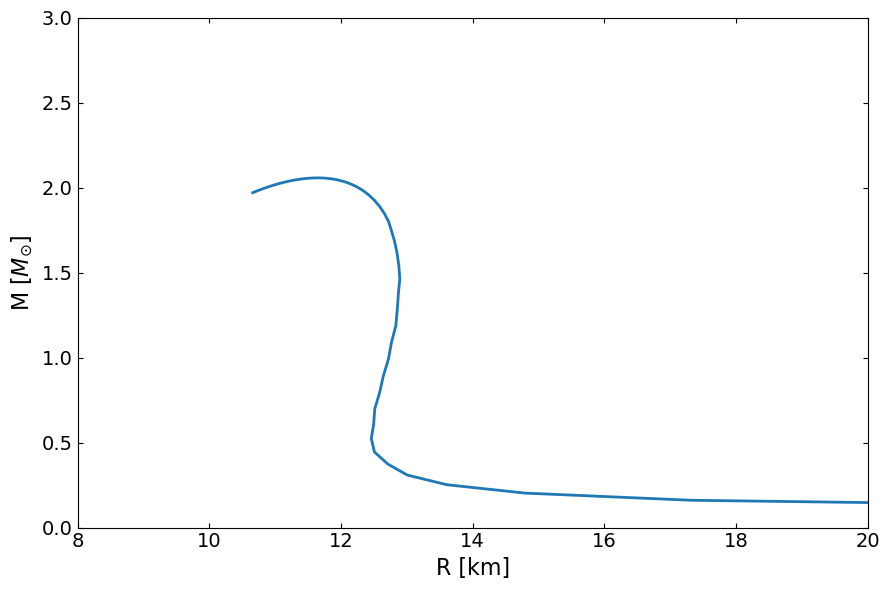

In [13]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
ax.plot(MR[0], MR[1],lw=2)
ax.set_ylabel(r'M [$M_{\odot}$]', fontsize=16)
ax.set_xlabel('R [km]', fontsize=16)
ax.set_xlim(8., 20.)
ax.set_ylim(0,3)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()